# Word Count

## Spark

In [1]:
import pyspark
sc = pyspark.SparkContext('local[*]')

# do something to prove it worksC
rdd = sc.parallelize(range(1000))
rdd.takeSample(False, 5)



[186, 594, 319, 76, 551]

In [3]:
#Create an rdd by reading a file
lines = sc.textFile('data/hamlet.txt')
lines.take(5)

['\tHAMLET', '', '', '\tDRAMATIS PERSONAE', '']

## Using Regular Expression and Split

    - re.split('\W+', 'Dogs, cats, birds.') - split line into words
    
    ['Dogs', 'cats', 'birds', '

    - strip out unwanted characters


In [6]:
#import the regular expression library
import re
hamlet = lines.flatMap(lambda line: re.split('\W+', line.lower().strip()))
hamlet.take(5)

['hamlet', '', '', 'dramatis', 'personae']

In [9]:
# Drop words of length <= 2

hamlet = hamlet.filter(lambda x: len(x) > 2 )
print(hamlet.take(5))

['hamlet', 'dramatis', 'personae', 'claudius', 'king']


In [12]:
hamletTuple = hamlet.map(lambda word: (word, 1))
hamletTuple.take(5)

[('hamlet', 1), ('dramatis', 1), ('personae', 1), ('claudius', 1), ('king', 1)]

In [13]:
hamletWordCount = hamletTuple.reduceByKey(lambda a, b: a + b)
hamletWordCount.take(5)

[('dramatis', 1), ('king', 171), ('denmark', 22), ('son', 20), ('late', 9)]

### SortByKey

sortByKey([ascending], [numTasks])

When called on a dataset of (Key, Value pairs where K implements Ordered, returns a dataset of (Key, Value) pairs sorted by keys in ascending or descending order, as specified in the boolean ascending argument.


In [14]:
decending = hamletWordCount.map(lambda x: (x[1], x[0])).sortByKey(False)
decending.take(20)

[(930, 'the'),
 (843, 'and'),
 (496, 'you'),
 (368, 'hamlet'),
 (346, 'that'),
 (278, 'lord'),
 (262, 'not'),
 (238, 'his'),
 (238, 'this'),
 (232, 'but'),
 (232, 'with'),
 (215, 'for'),
 (211, 'your'),
 (186, 'what'),
 (171, 'king'),
 (160, 'him'),
 (149, 'have'),
 (134, 'will'),
 (124, 'polonius'),
 (112, 'horatio')]

### Swap the components of the tuple for sorting


In [18]:
tmp = decending.map(lambda x: (x[1], x[0]))
tmp.take(20)

[('the', 930),
 ('and', 843),
 ('you', 496),
 ('hamlet', 368),
 ('that', 346),
 ('lord', 278),
 ('not', 262),
 ('his', 238),
 ('this', 238),
 ('but', 232),
 ('with', 232),
 ('for', 215),
 ('your', 211),
 ('what', 186),
 ('king', 171),
 ('him', 160),
 ('have', 149),
 ('will', 134),
 ('polonius', 124),
 ('horatio', 112)]

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot(words):
    values = list(map(lambda x: x[1], words))
    labels = list(map(lambda x: x[0], words))
    plt.barh(range(len(values)), values, color='grey')
    plt.yticks(range(len(values)), labels)
    plt.show()

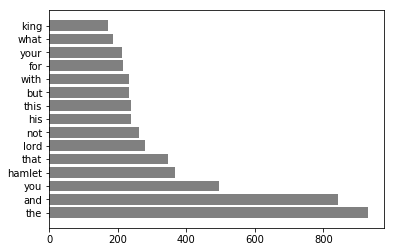

In [20]:
plot(tmp.take(15))

## Summary code

In [22]:
words = sc.textFile('data/hamlet.txt')\
        .flatMap(lambda line: re.split('\W+', line.lower().strip()))\
        .filter(lambda x: len(x) > 2 )\
        .map(lambda word: (word, 1))\
        .reduceByKey(lambda a, b: a + b)\
        .map(lambda x: (x[1], x[0])).sortByKey(False)   

words.take(15)

[(930, 'the'),
 (843, 'and'),
 (496, 'you'),
 (368, 'hamlet'),
 (346, 'that'),
 (278, 'lord'),
 (262, 'not'),
 (238, 'his'),
 (238, 'this'),
 (232, 'but'),
 (232, 'with'),
 (215, 'for'),
 (211, 'your'),
 (186, 'what'),
 (171, 'king')]

## Text filtering

In [23]:
words = sc.textFile('data/hamlet.txt')

How many lines contain the word <em>hamlet</em>?

In [24]:
tmp = words.filter(lambda x: "hamlet" in x.lower())
tmp.count()

367

What percent of lines contain "hamlet"?

In [27]:
'{0:0.2f}%'.format(100*tmp.count()/float(words.count()))

'7.26%'

How about <em>claudius</em> and <em>hamlet</em>?

In [28]:
tmp.filter( lambda x: 'claudius' in x.lower()).count()

12

In [29]:
tmp.filter( lambda x: 'claudius' in x.lower()).collect()

['\t[Enter KING CLAUDIUS, QUEEN GERTRUDE, HAMLET,',
 "KING CLAUDIUS\tThough yet of Hamlet our dear brother's death",
 "KING CLAUDIUS\t'Tis sweet and commendable in your nature, Hamlet,",
 'KING CLAUDIUS\tHow fares our cousin Hamlet?',
 'KING CLAUDIUS\tI have nothing with this answer, Hamlet; these words',
 'KING CLAUDIUS\tWhat, Gertrude? How does Hamlet?',
 "KING CLAUDIUS\tNow, Hamlet, where's Polonius?",
 'KING CLAUDIUS\tHamlet, this deed, for thine especial safety,--',
 'KING CLAUDIUS\tAy, Hamlet.',
 'KING CLAUDIUS\tThy loving father, Hamlet.',
 'KING CLAUDIUS\tFrom Hamlet! who brought them?',
 "KING CLAUDIUS\t'Tis Hamlets character. 'Naked!"]

## Run word count for Beowulf filtering out words whose length is less than 5

In [30]:
words = sc.textFile('data/beowulf.txt')\
        .flatMap(lambda line: re.split('\W+', line.lower().strip()))\
        .filter(lambda x: <fill in> )\
        .map(lambda word: <fill in>)\
        .reduceByKey(lambda a, b: <fill in>)\
        .map(lambda x: <fill in>).sortByKey(False)   

words.take(15)



SyntaxError: invalid syntax (<ipython-input-30-ae7383aa7e28>, line 3)

In [ ]:
tmp = words.map(lambda x: (x[1], x[0]))
tmp.take(20)
plot(tmp.take(15))